# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
data["Mouse ID"].nunique()


249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = data[data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]["Mouse ID"].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_id_list = data[data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_id_list


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_cleaned = data[data["Mouse ID"] != "g989"]
data_cleaned.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
data_cleaned["Mouse ID"].nunique()


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

tumor_mean_by_drug = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_mean_by_drug_df = pd.DataFrame(tumor_mean_by_drug)
tumor_mean_by_drug_df = pd.DataFrame(tumor_mean_by_drug_df).rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
tumor_mean_by_drug_df


,Mean Tumor Volume
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.320930
Ramicane,40.216745
Stelasyn,54.233149


In [10]:
tumor_median_by_drug = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_median_by_drug_df = pd.DataFrame(tumor_median_by_drug)
tumor_median_by_drug_df = pd.DataFrame(tumor_median_by_drug_df).rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
tumor_median_by_drug_df


,Median Tumor Volume
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.446266
Ramicane,40.673236
Stelasyn,52.431737


In [11]:
tumor_var_by_drug = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_var_by_drug_df = pd.DataFrame(tumor_var_by_drug)
tumor_var_by_drug_df = pd.DataFrame(tumor_var_by_drug_df).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
tumor_var_by_drug_df


,Tumor Volume Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,43.852013
Ramicane,23.486704
Stelasyn,59.450562


In [12]:
tumor_std_by_drug = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_std_by_drug_df = pd.DataFrame(tumor_std_by_drug)
tumor_std_by_drug_df = pd.DataFrame(tumor_std_by_drug_df).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
tumor_std_by_drug_df


,Tumor Volume Std. Dev.
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.622085
Ramicane,4.846308
Stelasyn,7.710419


In [13]:
tumor_sem_by_drug = data_cleaned.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
tumor_sem_by_drug_df = pd.DataFrame(tumor_sem_by_drug)
tumor_sem_by_drug_df = pd.DataFrame(tumor_sem_by_drug_df).rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})
tumor_sem_by_drug_df


,Tumor Volume Std. Err.
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.544332
Ramicane,0.320955
Stelasyn,0.573111


In [14]:
summary = pd.merge(tumor_mean_by_drug_df, tumor_median_by_drug_df, on="Drug Regimen", how="left")
summary = pd.merge(summary, tumor_var_by_drug_df, on="Drug Regimen", how="left")
summary = pd.merge(summary, tumor_std_by_drug_df, on="Drug Regimen", how="left")
summary = pd.merge(summary, tumor_sem_by_drug_df, on="Drug Regimen", how="left")
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
        Mean_Tumor_Volume='mean',
        Median_Tumor_Volume='median',
        Tumor_Volume_Variance='var',
        Tumor_Volume_Std_Dev='std',
        Tumor_Volume_Std_Err='sem'
    ).reset_index()
summary_aggregation


,Drug Regimen,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_timepoints = data_cleaned["Drug Regimen"].value_counts()
mouse_timepoints_df = pd.DataFrame(mouse_timepoints)
mouse_timepoints_df = pd.DataFrame(mouse_timepoints_df).rename(columns={"count": "# of Observed Mouse Timepoints"})
mouse_timepoints_df


,# of Observed Mouse Timepoints
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


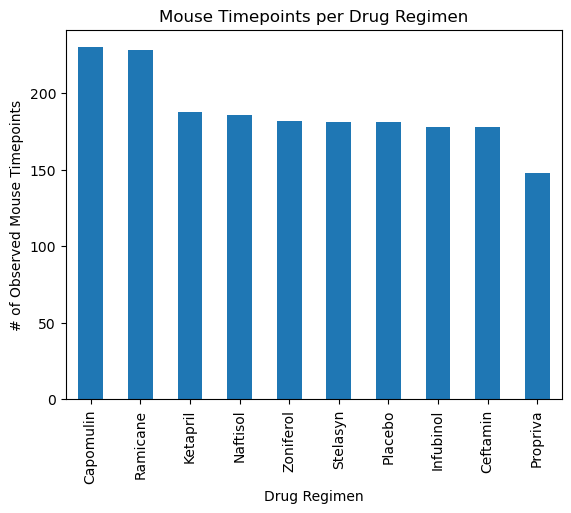

In [17]:
mouse_timepoints_df.plot(kind="bar", title="Mouse Timepoints per Drug Regimen", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend=False)
plt.show()


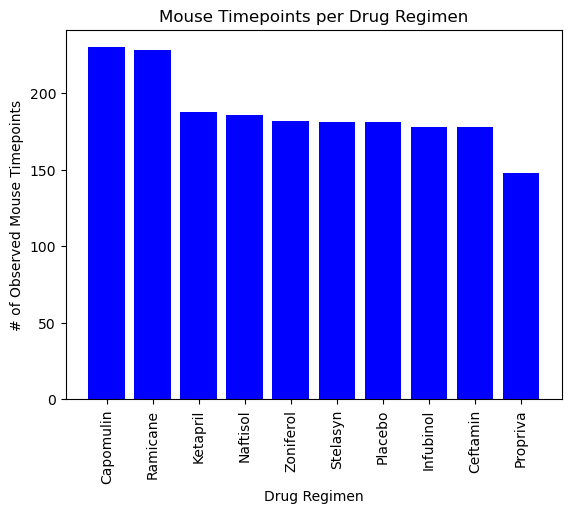

In [18]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_timepoints_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, mouse_timepoints_df["# of Observed Mouse Timepoints"], color='b', align="center")
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation="vertical")
plt.title("Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()


In [19]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

sex = data_cleaned[["Mouse ID", "Sex"]]
unique_sex = sex.drop_duplicates(subset=["Mouse ID"])
unique_sex_count = unique_sex["Sex"].value_counts()
unique_sex_count_df = pd.DataFrame(unique_sex_count)
unique_sex_count_df = pd.DataFrame(unique_sex_count_df).rename(columns={"count": "Count"})
unique_sex_count_df


,Count
Sex,
Male,125
Female,123


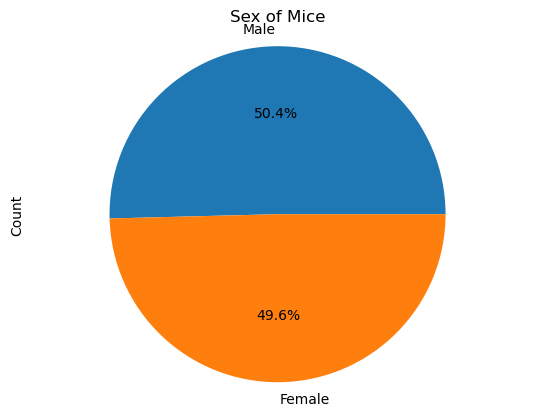

In [20]:
unique_sex_count_df.plot(kind="pie", y="Count", autopct="%1.1f%%", title="Sex of Mice", legend=False)
plt.axis("equal")
plt.show()


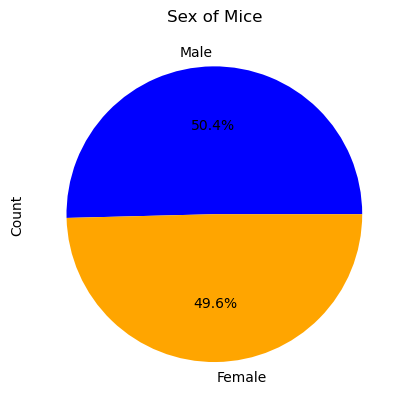

In [21]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
labels = ["Male", "Female"]
sizes = unique_sex_count_df["Count"]
colors = ["blue", "orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Sex of Mice")
plt.ylabel("Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

four_treatment = data_cleaned[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
four_treatment = four_treatment.loc[four_treatment["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
max_timepoints = four_treatment.groupby("Mouse ID")["Timepoint"].max().reset_index()
four_treatment = pd.merge(max_timepoints, four_treatment, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
four_treatment_df = pd.DataFrame(four_treatment)
four_treatment_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

capomulin_treatment = data_cleaned[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
capomulin_treatment = capomulin_treatment.loc[capomulin_treatment["Drug Regimen"] == "Capomulin"]
max_timepoints = capomulin_treatment.groupby("Mouse ID")["Timepoint"].max().reset_index()
capomulin_treatment = pd.merge(max_timepoints, capomulin_treatment, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
capomulin_treatment_df = pd.DataFrame (capomulin_treatment)

mouse_id = capomulin_treatment_df["Mouse ID"]
tumor_volumes = capomulin_treatment_df["Tumor Volume (mm3)"]
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_id = []
outlier_volume = []

for idx, tumor_volume in tumor_volumes.items():
    if tumor_volume < lower_bound or tumor_volume > upper_bound:
        outlier_id.append(mouse_id.iloc[idx])
        outlier_volume.append(tumor_volume)
        
if outlier_id:
    print("Capomulin's potential outliers:")
    for id, volume in zip(outlier_id, outlier_volume):
        print(f"The outlier has a mouse ID of {id} and its tumor volume is {volume} mm3.")

else:
    print("Capomulin's potential outliers: Nil")


Capomulin's potential outliers: Nil


In [24]:
ramicane_treatment = data_cleaned[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
ramicane_treatment = ramicane_treatment.loc[ramicane_treatment["Drug Regimen"] == "Ramicane"]
max_timepoints = ramicane_treatment.groupby("Mouse ID")["Timepoint"].max().reset_index()
ramicane_treatment = pd.merge(max_timepoints, capomulin_treatment, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
ramicane_treatment_df = pd.DataFrame (ramicane_treatment)

mouse_id = ramicane_treatment_df["Mouse ID"]
tumor_volumes = ramicane_treatment_df["Tumor Volume (mm3)"]
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_id = []
outlier_volume = []

for idx, tumor_volume in tumor_volumes.items():
    if tumor_volume < lower_bound or tumor_volume > upper_bound:
        outlier_id.append(mouse_id.iloc[idx])
        outlier_volume.append(tumor_volume)
        
if outlier_id:
    print("Ramicane's potential outliers:")
    for id, volume in zip(outlier_id, outlier_volume):
        print(f"The outlier has a mouse ID of {id} and its tumor volume is {volume} mm3.")

else:
    print("Ramicane's potential outliers: Nil")
    

Ramicane's potential outliers: Nil


In [25]:
infubinol_treatment = data_cleaned[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
infubinol_treatment = infubinol_treatment.loc[infubinol_treatment["Drug Regimen"] == "Infubinol"]
max_timepoints = infubinol_treatment.groupby("Mouse ID")["Timepoint"].max().reset_index()
infubinol_treatment = pd.merge(max_timepoints, infubinol_treatment, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
infubinol_treatment_df = pd.DataFrame (infubinol_treatment)

mouse_id = infubinol_treatment_df["Mouse ID"]
tumor_volumes = infubinol_treatment_df["Tumor Volume (mm3)"]
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_id = []
outlier_volume = []

for idx, tumor_volume in tumor_volumes.items():
    if tumor_volume < lower_bound or tumor_volume > upper_bound:
        outlier_id.append(mouse_id.iloc[idx])
        outlier_volume.append(tumor_volume)
        
if outlier_id:
    print("Infubinol's potential outliers:")
    for id, volume in zip(outlier_id, outlier_volume):
        print(f"The outlier has a mouse ID of {id} and its tumor volume is {volume} mm3.")

else:
    print("Infubinol's potential outliers: Nil")
    

Infubinol's potential outliers:
The outlier has a mouse ID of c326 and its tumor volume is 36.3213458 mm3.


In [26]:
ceftamin_treatment = data_cleaned[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
ceftamin_treatment = ceftamin_treatment.loc[ceftamin_treatment["Drug Regimen"] == "Ceftamin"]
max_timepoints = ceftamin_treatment.groupby("Mouse ID")["Timepoint"].max().reset_index()
ceftamin_treatment = pd.merge(max_timepoints, ceftamin_treatment, on=["Mouse ID", "Timepoint"], how="left")[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]
ceftamin_treatment_df = pd.DataFrame (ceftamin_treatment)

mouse_id = ceftamin_treatment_df["Mouse ID"]
tumor_volumes = ceftamin_treatment_df["Tumor Volume (mm3)"]
quartiles = tumor_volumes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outlier_id = []
outlier_volume = []

for idx, tumor_volume in tumor_volumes.items():
    if tumor_volume < lower_bound or tumor_volume > upper_bound:
        outlier_id.append(mouse_id.iloc[idx])
        outlier_volume.append(tumor_volume)
        
if outlier_id:
    print("Ceftamin's potential outliers:")
    for id, volume in zip(outlier_id, outlier_volume):
        print(f"The outlier has a mouse ID of {id} and its tumor volume is {volume} mm3.")

else:
    print("Ceftamin's potential outliers: Nil")


Ceftamin's potential outliers: Nil


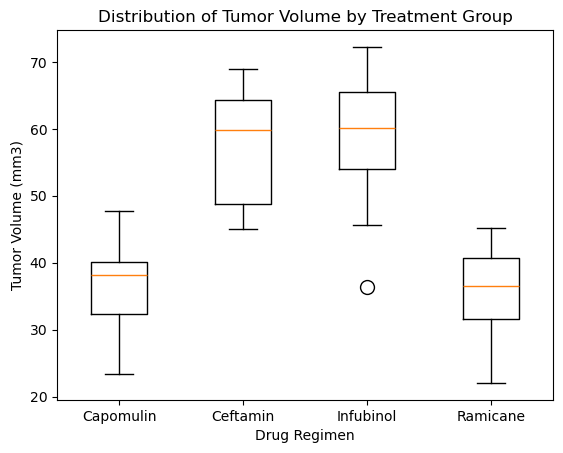

In [36]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
grouped_data = [group["Tumor Volume (mm3)"].values for name, group in four_treatment_df.groupby("Drug Regimen")]
labels = [name for name, _ in four_treatment_df.groupby("Drug Regimen")]
fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Volume by Treatment Group")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
flierprops = dict(marker="o", color="red", alpha=1.0, markersize=10, linestyle="None", markeredgecolor="black", markeredgewidth=1)
ax1.boxplot(grouped_data, labels=labels, flierprops=flierprops)
plt.show()


## Line and Scatter Plots

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_i509 = data_cleaned.loc[data_cleaned["Mouse ID"] == "l509"]
mouse_i509


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


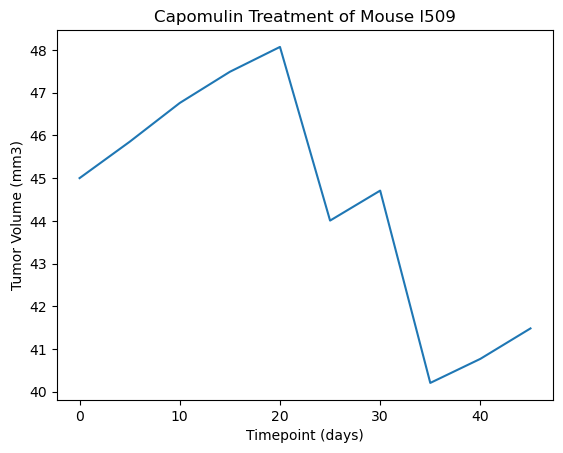

In [29]:
mouse_i509.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", title="Capomulin Treatment of Mouse l509", xlabel = "Timepoint (days)", ylabel="Tumor Volume (mm3)", legend=False)
plt.show()


In [30]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_only = data_cleaned.loc[data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_by_volume = capomulin_only.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
capomulin_by_volume_df = pd.DataFrame(capomulin_by_volume)
capomulin_by_volume_df = pd.DataFrame(capomulin_by_volume_df).rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

capomulin_by_weight = capomulin_only.groupby(["Mouse ID"])["Weight (g)"].mean()
capomulin_by_weight_df = pd.DataFrame(capomulin_by_weight)

capomulin = pd.merge(capomulin_by_volume_df, capomulin_by_weight_df, on="Mouse ID", how="left")
capomulin


,Average Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


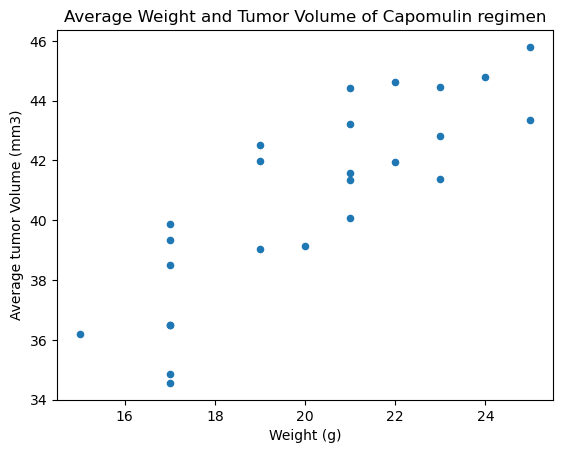

In [31]:
capomulin.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", title="Average Weight and Tumor Volume of Capomulin regimen", xlabel = "Weight (g)", ylabel="Average tumor Volume (mm3)", legend=False)
plt.show()


## Correlation and Regression

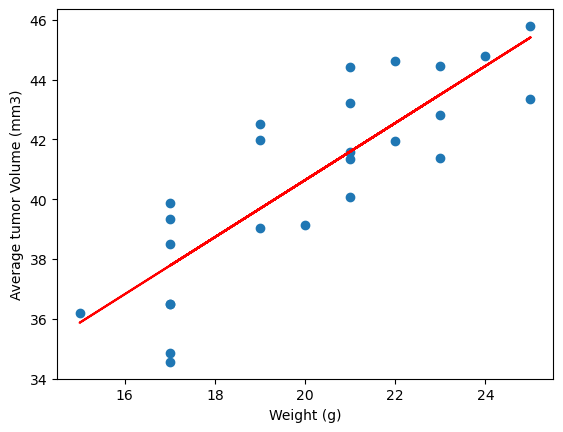

The correlation between mouse weight and the average tumor volume is 0.84


In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = capomulin["Weight (g)"]
y_values = capomulin["Average Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0,50), fontsize=15, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average tumor Volume (mm3)")
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(y_values,x_values)[0],2)}")
